In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os


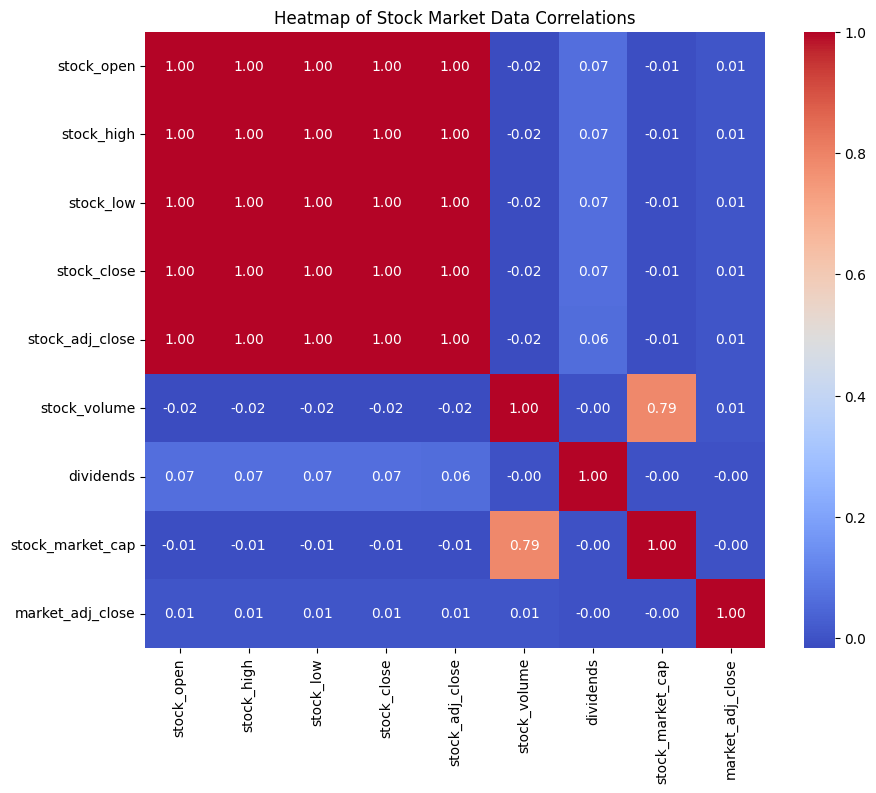

In [8]:
# Load the CSV file

path = 'C:/Users/Janet/OneDrive - The University of Chicago/Data_policy/final-project-janet'
file_name = 'combined_stock_data.csv'
file_path = os.path.join(path, file_name)
df = pd.read_csv(file_path)

# Selecting a subset of relevant columns for the heatmap
heatmap_data = df[['stock_open', 'stock_high', 'stock_low', 'stock_close', 
                   'stock_adj_close', 'stock_volume', 'dividends', 'stock_market_cap', 'market_adj_close']]

# Calculating the correlation matrix
corr = heatmap_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Stock Market Data Correlations')
plt.show()

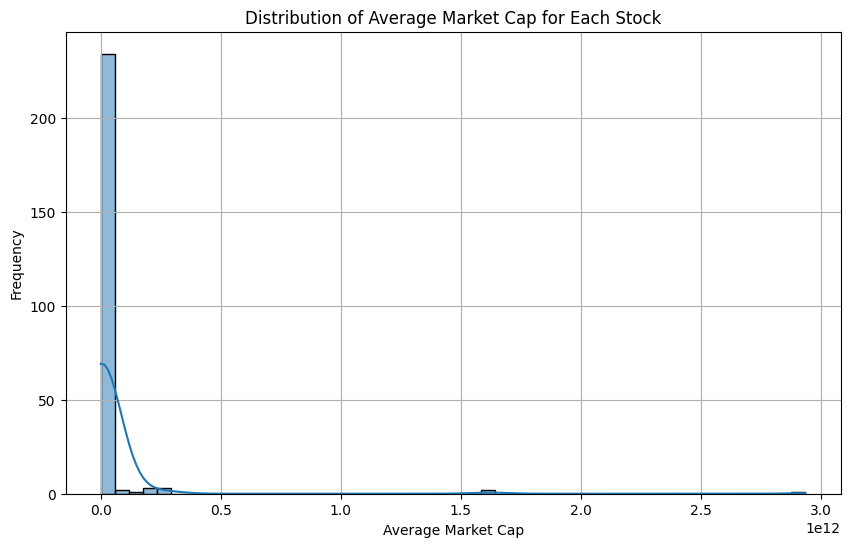

In [17]:
# Calculate the average market cap for each stock (identified by the 'ticker')
average_market_caps = df.groupby('ticker')['stock_market_cap'].mean()

# Plotting the distribution of average market caps
plt.figure(figsize=(10, 6))
sns.histplot(average_market_caps, bins=50, kde=True)
plt.title('Distribution of Average Market Cap for Each Stock')
plt.xlabel('Average Market Cap')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

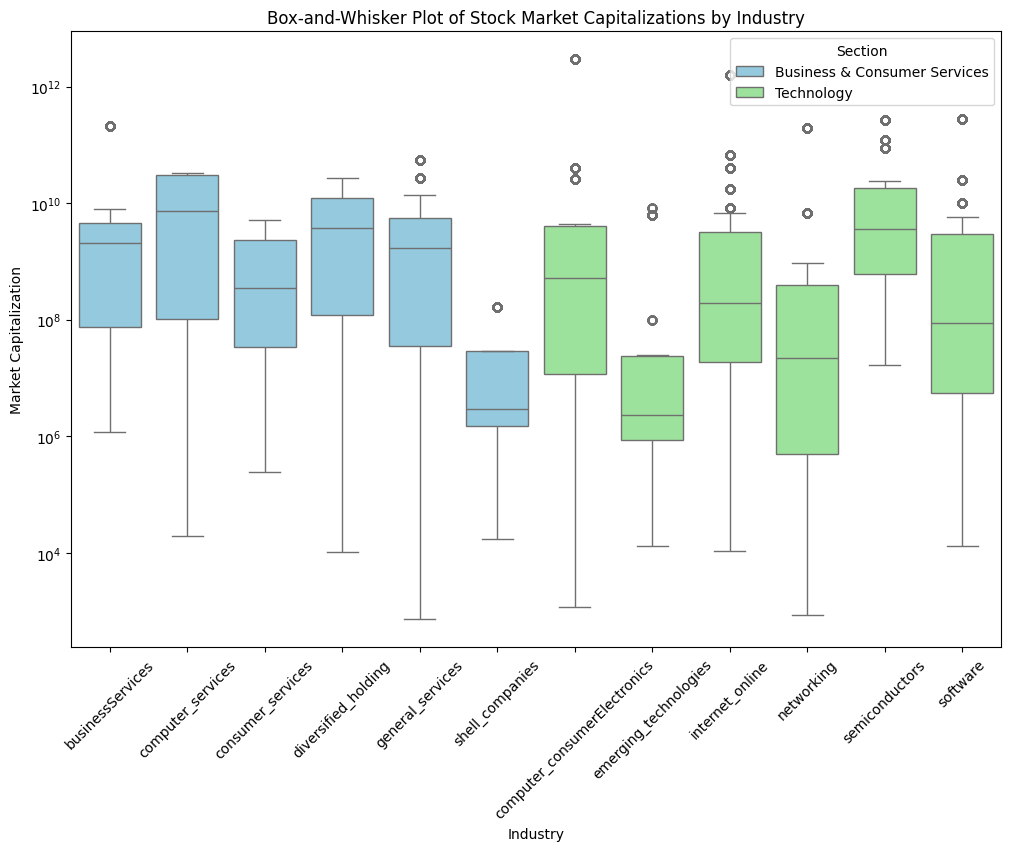

In [32]:


# Define the industry groups
business_consumer_services = ['businessServices', 'computer_services', 'consumer_services', 'diversified_holding', 'general_services', 'shell_companies']
technology = ['computer_consumerElectronics', 'emerging_technologies', 'internet_online', 'networking', 'semiconductors', 'software']

# Create a new column in the dataframe to indicate the section each industry belongs to
df['section'] = df['industry'].apply(lambda x: 'Business & Consumer Services' if x in business_consumer_services else 'Technology')

# Define a color palette for the two sections
palette = {'Business & Consumer Services': 'skyblue', 'Technology': 'lightgreen'}

# Plotting the modified Box-and-Whisker Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='industry', y='stock_market_cap', hue='section', data=df, palette=palette, dodge=False)
plt.title('Box-and-Whisker Plot of Stock Market Capitalizations by Industry')
plt.ylabel('Market Capitalization')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.yscale('log')
plt.legend(title='Section')
plt.show()


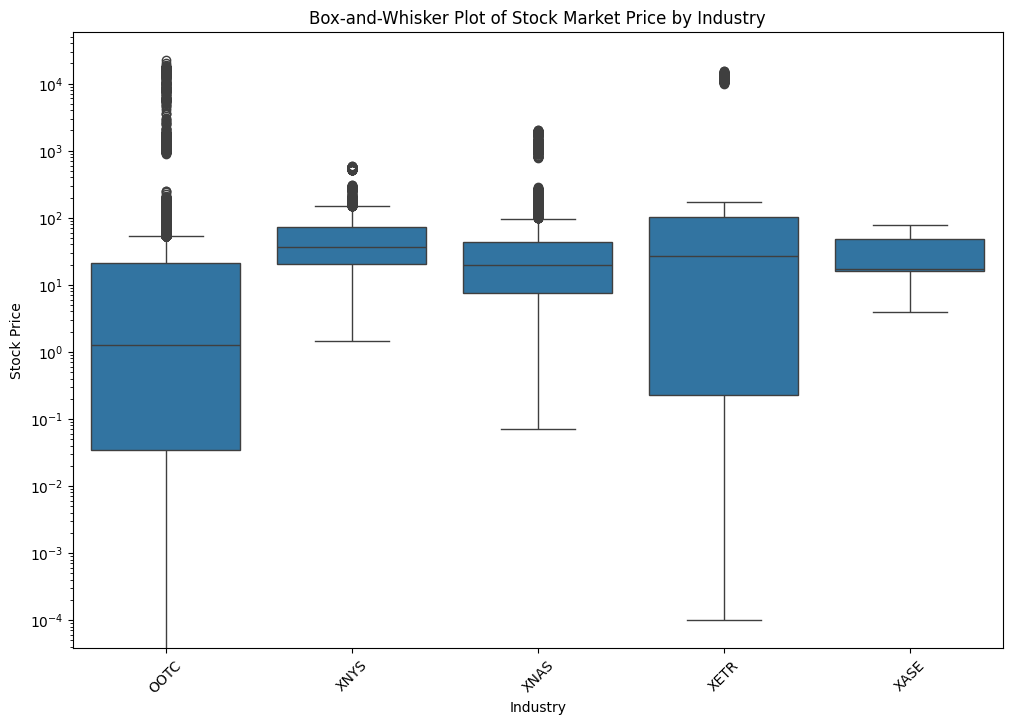

In [35]:
market_caps = df['stock_adj_close']
industries = df['exchange']

# Plotting the Box-and-Whisker Plot for 'stock_market_cap' by industry
plt.figure(figsize=(12, 8))
sns.boxplot(x=industries, y=market_caps)
plt.title('Box-and-Whisker Plot of Stock Market Price by Industry')
plt.ylabel('Stock Price')
plt.xlabel('Industry')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yscale('log')  # Using a logarithmic scale due to large range of values
plt.show()